4번 문항은 최적화 알고리즘을 구현하는 문제입니다.  10점 

아래에 제시된 함수에 대한 최적화 방식을 설명하고 실제 최솟값을 탐색하고 결과를 도출하는 과정을 통해 최솟값을 제시하십시오.

설명은 Python code 내에 """ """, # 또는 Jupyter notebook의 markdown을 이용하되 단, 명시적으로 답안 확인이 가능하도록 표기하십시오.

# 4. 최적화 문제 코드

# [실행결과]

In [ ]:
"""최적화 과정에서 수식 구현에서는 numpy만을 이용하였습니다."""
import numpy as np
""" 해당 라이브러리는 시각화 자료 첨부와 폰트 문제를 해결하기위해 추가적으로 첨부한 라이브러리입니다."""
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False 
%matplotlib inline

[경사 하강법을 통한 최적화 과정및 결과]
start -> middle --> final , 지점별 기울기(도함수값) 변화를 보여 줍니다.
	[start_position 지점에서의 x,y별 도함수값]
	 -12 , -4
	[middle_position 지점에서의 x,y별 도함수값]
	 -0.07968984079003966 , -0.1746663328370519
	[final_position 지점에서의 x,y별 도함수값]
	 -0.0038550766222793936 , -0.009248788930949603
--> 이동 trend를 보시면, 시간이 지남에 따라 point별 도함수 값이 점점 감소하며 0에 수렴해 갑니다.
본 프로그램에서는 learning rate를 0.1로 설정하였고, next point = [x-(learning_rate* f'(x,y)@x),y-(learning_rate*f'(x,y)@y))을 적용하며 step을 이동해 갔습니다.




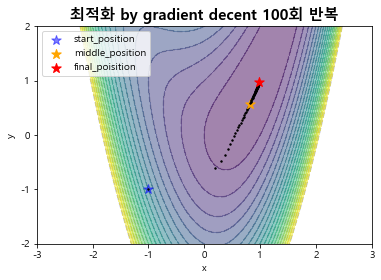

['답안 정리']
minimum값을 갖는 최적의 point를 찾기위하여, gradient decsent(경사하강법)을 이용하여 분석 진행하였습니다.
[해당 함수에 대한 그래프의 형태를 알아보기 위해 시각화 툴을 이용 하였으며, 인터넷 서칭을 통하여 해당 함수는 로젠브록이라는 대표적인 비선형 함수의 형태임을 참고 할 수 있었습니다.]

주어진 함수 (y - x**2)**2 + (1 - x)**2 의 경우는 x,y 두개의 변수를 갖는 비선형함수 이기 때문에 x,y에 대한 편미분을 적용하여 얻어낸 도함수식을 사용하였습니다.
x에 대한 f(x,y)의 도함수식은 2*(x - 1) - 4*x*(y - x**2), y에 대한 도함수식은 2 * (y - x**2)으로 계산하여 적용하였습니다.

경사하강법을 구현함에 있어 (x,y)에서의 도함수값과 러닝레이트(0.1)를 기반으로 업데이트 되는 (x,y)값을 계속해서 추적하였고, 반복학습 루프를 통하여 x,y에 대한 도함수 값이 0을 향해 수렴하는 final point지점을 찾을 수 있었습니다.

 시작지점은 -1,1 point에서 x,y값을 점차적으로 업데이트 시키는 과정을 100회 반복하였습다 
 그 결과는  0.9889260929865193 , 0.9733504229241071 지점으로 수렴하는 것을 확인하였다.

 따라서 문제에서 주어진 f(x,y) 함수에 대하여 최솟값을 갖는 최적의 x,y point는'(1.0,1.0)'(두자리수에서 반올림)으로 확인됩니다.


In [199]:
""" 문제 함수식 표현 """
def f_xy(x, y):
    return (y - x**2)**2 + (1 - x)**2

##########################################################################
""" f(x, y)의 편미분 """
def d_f_xy(x, y):
    return np.array((2*(x - 1) - 4*x*(y - x**2), 2 * (y - x**2)))
##########################################################################

""" 전반적인 그래프 표현을 위한 준비""" 
xx = np.linspace(-4, 4, 1000)
yy = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(xx, yy)
Z = f_xy(X, Y)    
# 그래프 설정 
levels = [i for i in range(20)]
plt.contourf(X, Y, Z, alpha=0.5, levels=levels )
plt.contour(X, Y, Z, colors="gray",linestyles='--',alpha=0.5, levels=levels, zorder=0)
############################################################################

"""최적화 경사 하강법을 위한 준비"""
print("[경사 하강법을 통한 최적화 과정및 결과]") 
""" learning rate & start point 설정 """
lr = 0.1  
x, y = -1, -1
plt.scatter(-1,-1,color = 'blue',marker='*' ,s=100,alpha=0.5 ,label='start_position')
print('start -> middle --> final , 지점별 기울기(도함수값) 변화를 보여 줍니다.')
print("\t[start_position 지점에서의 x,y별 도함수값]")
print('\t',d_f_xy(x,y)[0],',',d_f_xy(x,y)[1])  
""" 반복 횟수 설정 """
iter_number=100

""" 초기point - 변화율*기울기 변화 업데이트 루프  """

for i in range(iter_number):
# 해당 poin (x,y) t에서의 위치를 표현

    if i == iter_number//4:
        middle_point_x = x 
        middle_point_y = y
        plt.scatter(middle_point_x,middle_point_y,color = 'orange',marker='*' ,s=100,label='middle_position')
        print("\t[middle_position 지점에서의 x,y별 도함수값]")
        print('\t',d_f_xy(middle_point_x, middle_point_y)[0],',',d_f_xy(middle_point_x, middle_point_y)[1])  
    elif i < (iter_number-1) :
        plt.scatter(x,y,color = 'black' ,s=2)
        
    else : # 최종 반복후 x,y의 위치 position
        final_point_x = x 
        final_point_y = y
        plt.scatter(final_point_x,final_point_y,color = 'red',marker='*' ,s=100, label='final_poisition')
        print("\t[final_position 지점에서의 x,y별 도함수값]")
        print('\t',d_f_xy(final_point_x, final_point_y)[0],',',d_f_xy(final_point_x, final_point_y)[1])
        print("--> 이동 trend를 보시면, 시간이 지남에 따라 point별 도함수 값이 점점 감소하며 0에 수렴해 갑니다.")
        print("본 프로그램에서는 learning rate를 0.1로 설정하였고, next point = [x-(learning_rate* f""'""(x,y)@x),y-(learning_rate*f""'""(x,y)@y))을 적용하며 step을 이동해 갔습니다.\n\n")
# 해당 x,y point에서 미분값의 변화를 구한다
    div_f = d_f_xy(x, y)                        
# x,y 두 편미분 값들의 결과와 학습률을 곱하여 다음 이동할 포지션을 설정
    x = x - lr * div_f[0]     
    y = y - lr * div_f[1]

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-2, 2, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최적화 by gradient decent {}회 반복".format(iter_number) , weight ='bold' ,size= 15)
plt.legend(loc = 'upper left')
plt.show()

print("[""'답안 정리'""]") 

print("minimum값을 갖는 최적의 point를 찾기위하여, gradient decsent(경사하강법)을 이용하여 분석 진행하였습니다.")
print("[해당 함수에 대한 그래프의 형태를 알아보기 위해 시각화 툴을 이용 하였으며, 인터넷 서칭을 통하여 해당 함수는 로젠브록이라는 대표적인 비선형 함수의 형태임을 참고 할 수 있었습니다.]\n")
print("주어진 함수 (y - x**2)**2 + (1 - x)**2 의 경우는 x,y 두개의 변수를 갖는 비선형함수 이기 때문에 x,y에 대한 편미분을 적용하여 얻어낸 도함수식을 사용하였습니다.")
print("x에 대한 f(x,y)의 도함수식은 2*(x - 1) - 4*x*(y - x**2), y에 대한 도함수식은 2 * (y - x**2)으로 계산하여 적용하였습니다.\n")
print("경사하강법을 구현함에 있어 (x,y)에서의 도함수값과 러닝레이트(0.1)를 기반으로 업데이트 되는 (x,y)값을 계속해서 추적하였고, 반복학습 루프를 통하여 x,y에 대한 도함수 값이 0을 향해 수렴하는 final point지점을 찾을 수 있었습니다.")
print("\n 시작지점은 -1,1 point에서 x,y값을 점차적으로 업데이트 시키는 과정을 {}회 반복하였습다 \n 그 결과는 ".format(iter_number) ,final_point_x,',',final_point_y,"지점으로 수렴하는 것을 확인하였다." )
print("\n 따라서 문제에서 주어진 f(x,y) 함수에 대하여 최솟값을 갖는 최적의 x,y point는""'({},{})'""(두자리수에서 반올림)으로 확인됩니다.".format(round(final_point_x,1),round(final_point_y ,1)))

In [ ]:
# 참고.. 

""" 3차원에서 모습 확인  """ 
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize = (10,10))
ax = plt.subplot(1,1,1,projection = '3d')
ax.plot_surface(X,Y,Z,alpha = 0.5,color = 'red')
#ax.view_init(0,0)